## Outlier detection using Standard Deviation and z-score
Data set : https://www.kaggle.com/mustafaali96/weight-height

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

#### (1) Outlier detection using Standard deviation

<AxesSubplot:xlabel='Height', ylabel='Count'>

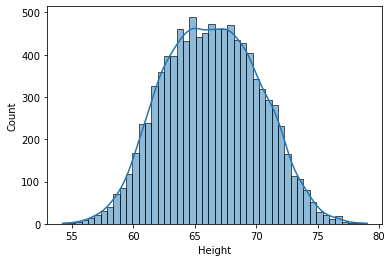

In [4]:
sns.histplot(df.Height,kde=True)

In [5]:
hight_mean=df.Height.mean()
hight_std=df.Height.std()

In [6]:
hight_mean + (3*hight_std)

77.91014411714076

In [7]:
hight_mean -(3*hight_std)

54.82497539250136

In [8]:
df[(df.Height <54.82497539250136) | (df.Height >77.91014411714076)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


- It returns 7 records which having outliers in Height column, we've to remove them.

In [9]:
weight_mean=df.Weight.mean()
weight_std=df.Weight.std()

In [10]:
weight_mean + (3*weight_std)

257.7656738523894

In [11]:
weight_mean - (3*weight_std)

65.11503981327212

In [12]:
df[(df.Weight > 257.7656738523894) | (df.Weight <65.11503981327212)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


- The Weight column only have 2 records containing outliers.

In [13]:
df_no_outliers=df[(df.Height >54.82497539250136) & (df.Height <77.91014411714076)]

In [14]:
df_no_outliers.shape

(9993, 3)

<AxesSubplot:xlabel='Height', ylabel='Count'>

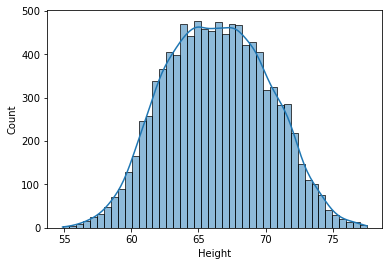

In [15]:
sns.histplot(df_no_outliers.Height,kde=True)

- Now we've removed some records which contains the outliers. 

#### (2) Outlier detection using Z-Score

- z-score will returns how many standard deviation away a data point is, from its mean.
- The formula is, z-score=(data_points-mean)/standard deviation

In [16]:
df['Height_zscore']=(df.Height-hight_mean)/hight_std

In [17]:
df['Weight_zscore']=(df.Weight-weight_mean)/weight_std
df.head()

,Gender,Height,Weight,Height_zscore,Weight_zscore
0,Male,73.847017,241.893563,1.943964,2.505672
1,Male,68.781904,162.310473,0.627505,0.027099
2,Male,74.110105,212.740856,2.012343,1.597726
3,Male,71.730978,220.042470,1.393991,1.825131
4,Male,69.881796,206.349801,0.913375,1.398680


In [18]:
df[(df.Height_zscore < -3) | (df.Height_zscore > 3)]

,Gender,Height,Weight,Height_zscore,Weight_zscore
994,Male,78.095867,255.690835,3.048271,2.935380
1317,Male,78.462053,227.342565,3.143445,2.052489
2014,Male,78.998742,269.989699,3.282934,3.380711
3285,Male,78.528210,253.889004,3.160640,2.879263
3757,Male,78.621374,245.733783,3.184854,2.625273
6624,Female,54.616858,71.393749,-3.054091,-2.804453
9285,Female,54.263133,64.700127,-3.146027,-3.012922


The z-score will also returns the same 7 records which we seen while dealing with standard deviation. 

In [19]:
df_without_outliers=df[(df.Height_zscore > -3) & (df.Height_zscore < 3)]
df_without_outliers.shape

(9993, 5)

- Here also the 7 records have been removed

<AxesSubplot:xlabel='Height_zscore', ylabel='Count'>

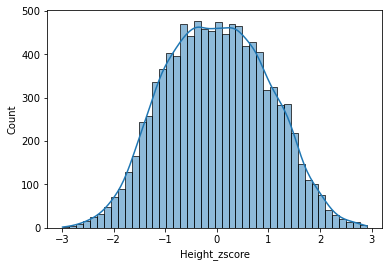

In [20]:
sns.histplot(df_without_outliers.Height_zscore,kde=True)

<AxesSubplot:xlabel='Weight_zscore', ylabel='Count'>

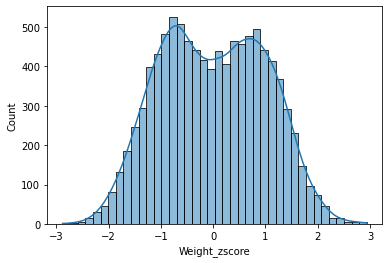

In [21]:
sns.histplot(df_without_outliers.Weight_zscore,kde=True)